In [8]:
import pandas as pd

# Load the dataset
wine_data = pd.read_csv('wine.csv')

In [9]:
# Display basic information
print(wine_data.info())
print(wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  ...  Nonflavanoids  Proanthocyanins  Color   Hue

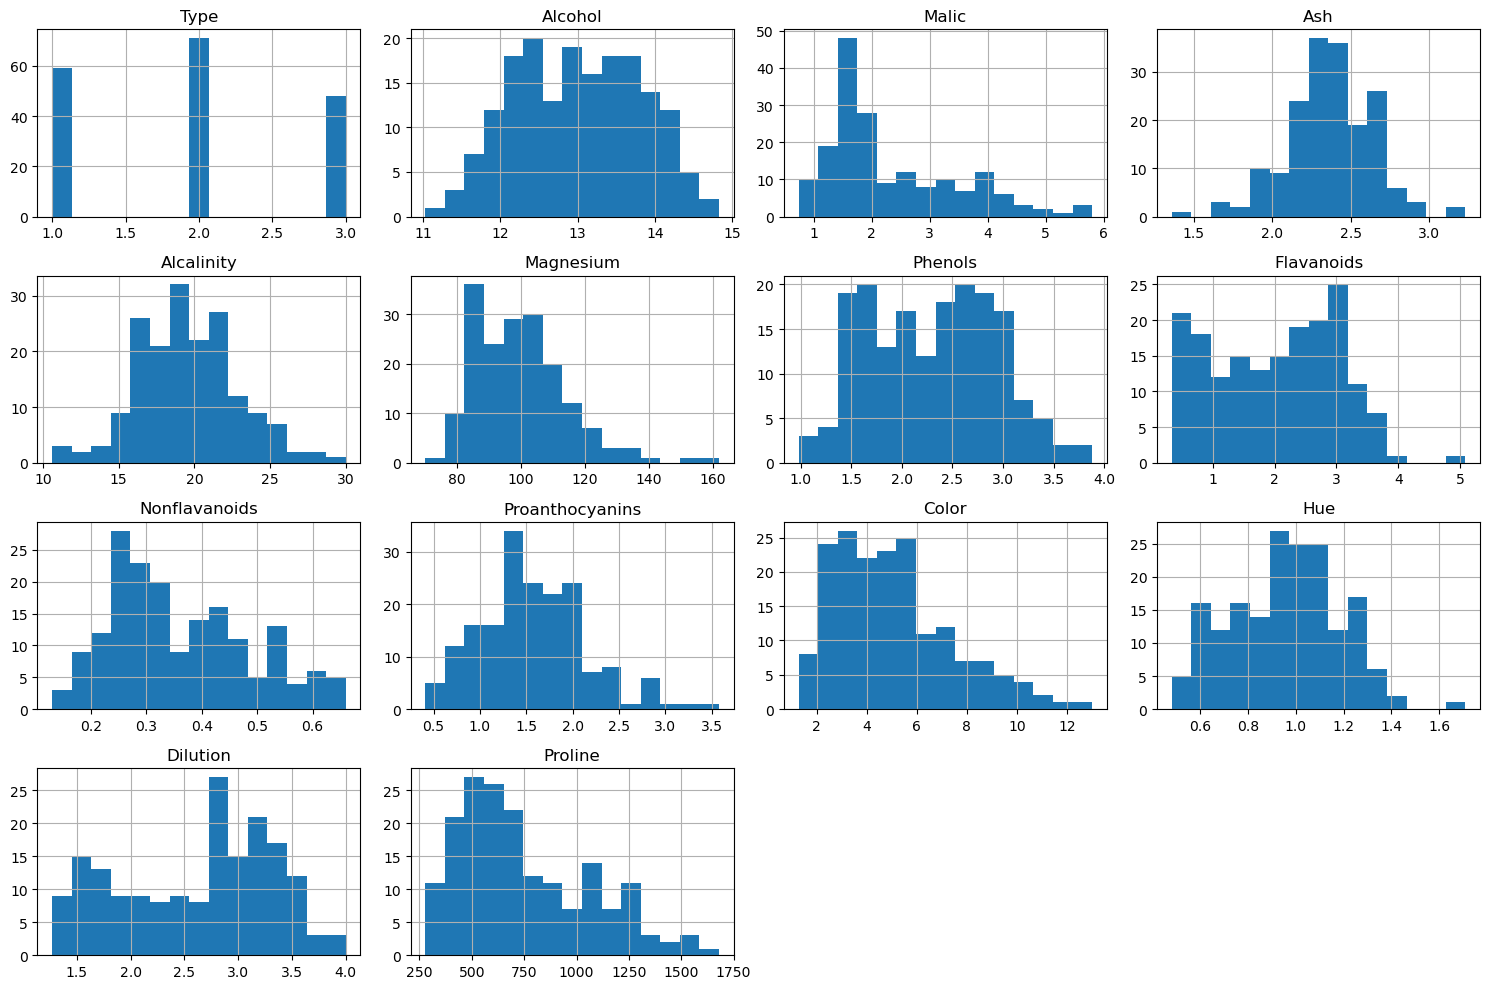

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

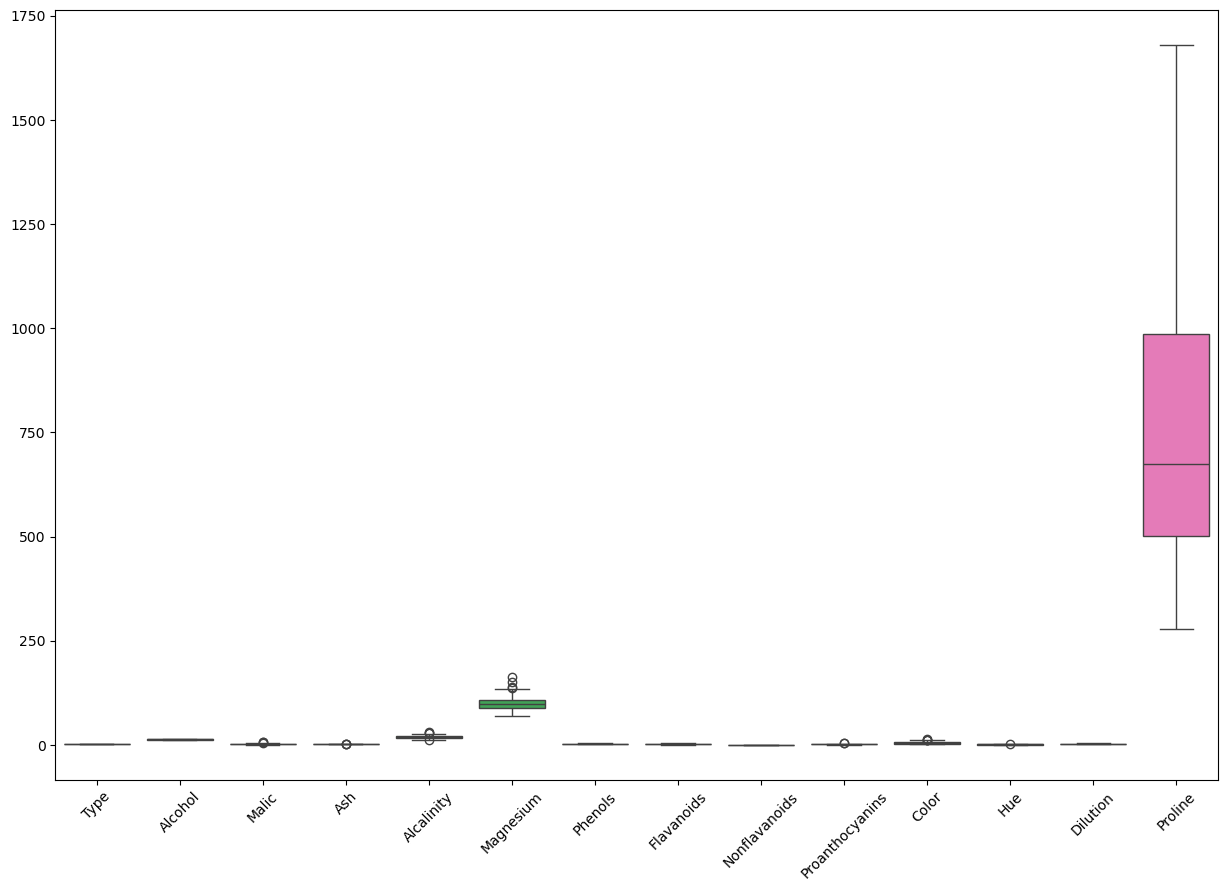

In [11]:
# Box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_data)
plt.xticks(rotation=45)
plt.show()

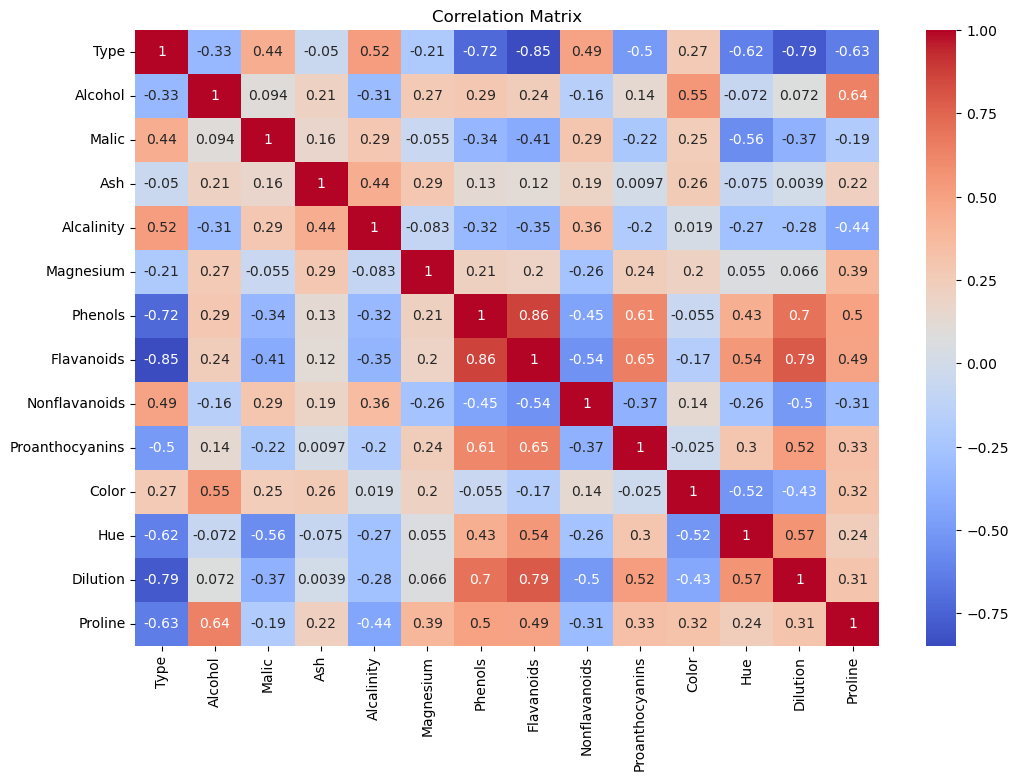

In [12]:
correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_wine_data = scaler.fit_transform(wine_data)


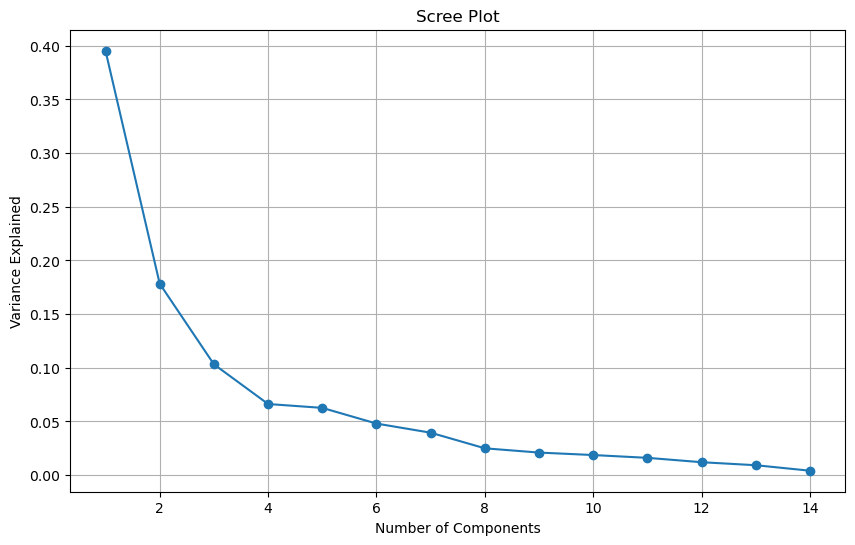

In [21]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(scaled_wine_data)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()


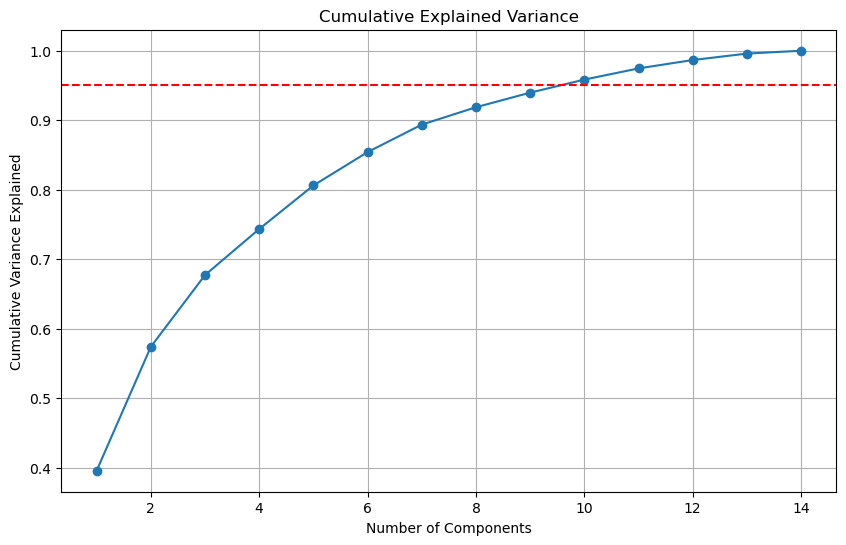

In [22]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Example threshold at 95%
plt.show()


In [24]:
n_components = 8  # Adjust based on previous analysis
pca = PCA(n_components=n_components)
pca_wine_data = pca.fit_transform(scaled_wine_data)


C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

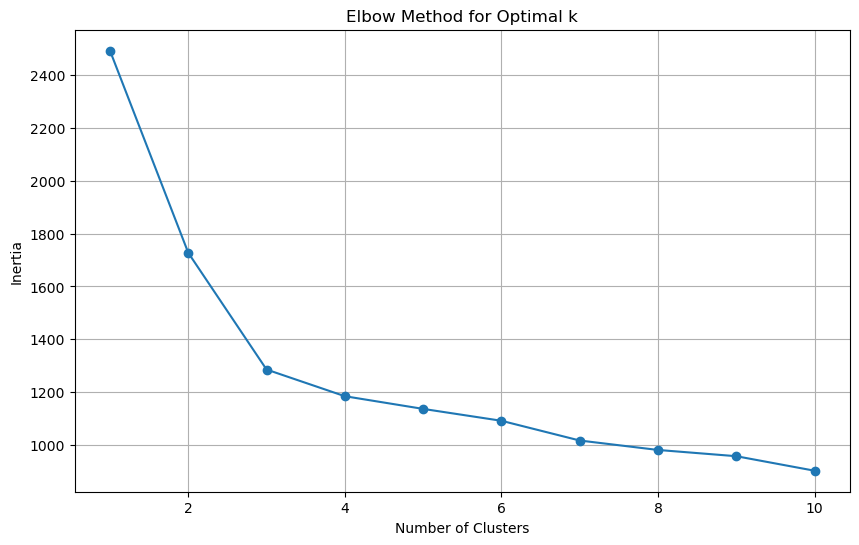

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_wine_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit K-means with the chosen number of clusters
optimal_k = 3  # Example choice
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_original = kmeans.fit_predict(scaled_wine_data)


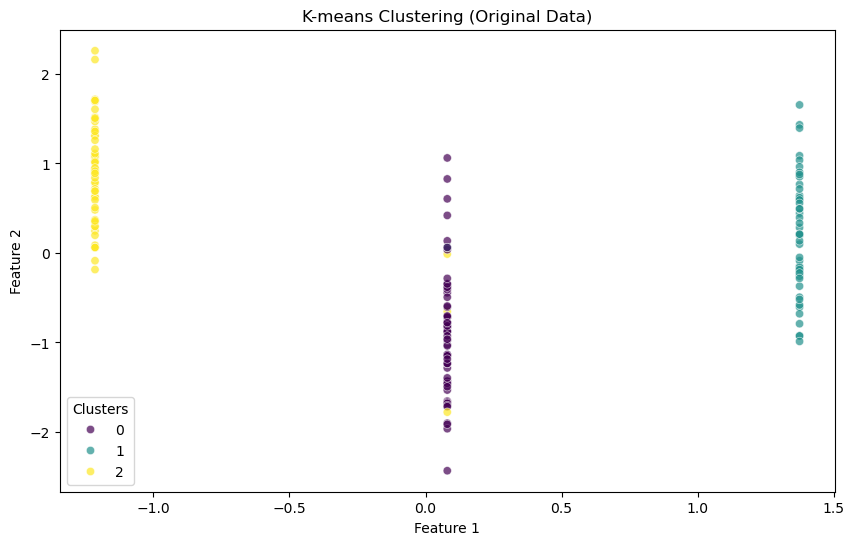

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_wine_data[:, 0], y=scaled_wine_data[:, 1], hue=clusters_original, palette='viridis', alpha=0.7)
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Clusters')
plt.show()


In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_wine_data, clusters_original)
db_index = davies_bouldin_score(scaled_wine_data, clusters_original)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')


Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [28]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_wine_data)


C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


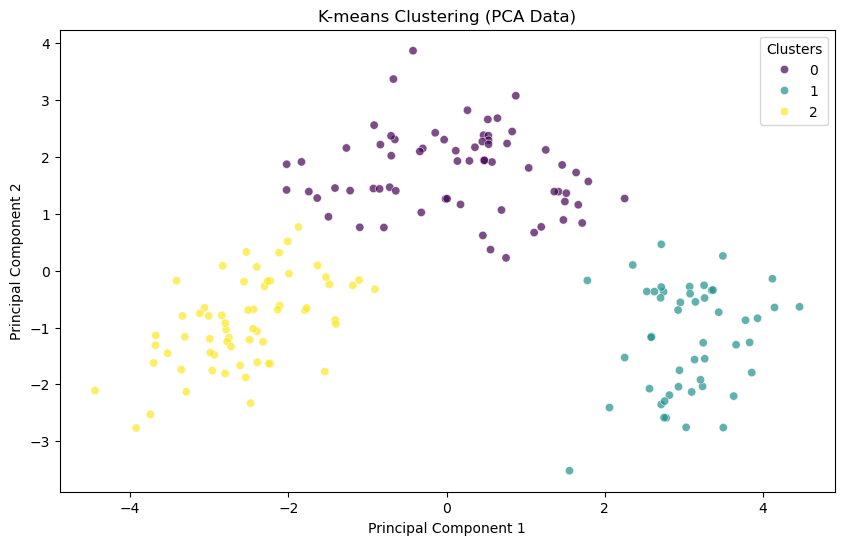

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_wine_data[:, 0], y=pca_wine_data[:, 1], hue=clusters_pca, palette='viridis', alpha=0.7)
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()


In [30]:
# Optionally, you can print out the cluster centroids and compare them
print('Original Data Cluster Centers:\n', kmeans.cluster_centers_)
print('PCA Data Cluster Centers:\n', kmeans_pca.cluster_centers_)


Original Data Cluster Centers:
 [[ 7.99603601e-02 -9.09328403e-01 -3.80707476e-01 -5.19747426e-01
   1.37767008e-01 -4.97451451e-01 -9.62003532e-02 -7.65223671e-04
  -4.11471063e-03  1.12388425e-02 -8.81229129e-01  4.32636626e-01
   2.30777949e-01 -7.63273163e-01]
 [ 1.34745816e+00  1.86543138e-01  9.04971453e-01  2.49210264e-01
   5.83703484e-01 -5.06353947e-02 -9.88556997e-01 -1.23619475e+00
   7.16841717e-01 -7.49607560e-01  9.88498285e-01 -1.19129878e+00
  -1.30153966e+00 -3.80044610e-01]
 [-1.15133539e+00  8.35232085e-01 -3.03809683e-01  3.64706042e-01
  -6.10191294e-01  5.77586799e-01  8.85237363e-01  9.77819557e-01
  -5.62089654e-01  5.80286581e-01  1.71063479e-01  4.73983650e-01
   7.79247107e-01  1.12518529e+00]]
PCA Data Cluster Centers:
 [[ 1.21711421e-01  1.75036892e+00  1.28333665e-01  9.42333870e-02
   5.62038605e-02  1.16008510e-01  1.64510535e-02  6.44114086e-03]
 [ 3.05866503e+00 -1.20826261e+00 -1.77541159e-01  9.57310533e-02
   7.16408426e-02  9.49678146e-02 -6.26481

## Comparison and Analysis
1. Compare Clustering Results
Analyze how the clusters differ between the original dataset and PCA-transformed data. Look for changes in cluster sizes and shapes.

2. Discuss Similarities or Differences
Reflect on how PCA may have helped in improving clustering or led to different results due to reduced dimensions.

3. Reflect on Impact of Dimensionality Reduction
Discuss how PCA affects the clustering, considering variance retention and potential loss of information.

4. Analyze Trade-offs
Consider the balance between complexity and interpretability when using PCA versus clustering directly on original data.